<img src="img/header_escom26.jpg" alt="header" style="height:200px;">

# Otsu's method
**Mothelet Delgado Izaird Alexander**




Es un metodo creado para la binarizacion mediante la obtencion de un umbral optimo.
Para ello se calcula el cociente entre ambas variancias y se busca un valor umbral para el que este cociente sea máximo.
Lo primero que tenemos que hacer es importar las librearias que ocuparemos como numpy

In [31]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

Ahora crearemos algunas funciones para hacer todo esto mas sencillo, de las primeras funciones que necesitamos es para mostrar el histograma, recrear la imagen con el umbral ya obtenido despues de haber aplicado el metodo otsu

In [32]:
def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y



def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


   
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            

def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w


def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]

threshold_values = {}


Una vez que tenemos construidas nuestras funciones procedemos a simplemente usar todo lo anterior

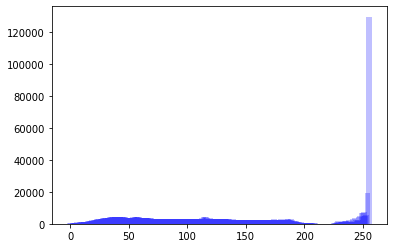

optimal threshold 153
CPU times: user 70 µs, sys: 2 µs, total: 72 µs
Wall time: 73.2 µs
CPU times: user 929 ms, sys: 29 µs, total: 929 ms
Wall time: 929 ms


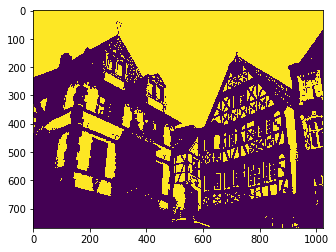

In [33]:
image = Image.open('img/img1.jpg').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
%time op_thres = get_optimal_threshold()

%time res = regenerate_img(img, op_thres)
plt.imshow(res)
plt.savefig("otsu.png")